# Special distributions

1. The Poisson distribution
2. The normal distribution
3. The geometric distribution
4. The negative binomial distribution
5. The gamma distribution

## The Poisson distribution

The Poisson process models the number of events that occur during each of a series **units**.

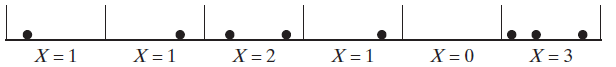

The units are often time or space. For instance:

- Number of costumers per *minute* calling a help center
- Number of wars starting in a given *year*
- Number of trees in an *acre*

The probability distribution of the Poisson gives the probability of observing $k$ events in a time period --given the length of the period and the average events per period--. Let the parameter $\lambda$ represent the rate at which events occur (e.g., $\lambda$ might be expressed as 2.5 events per minute), then:

$$P_{X}(k) = P(X=k) = \frac{e^{-\lambda} \lambda^{k}}{k !}, \quad k=0,1,2, \ldots $$

**Example of how to calculate probabilities:**

Let $X$ denote the number of bug parts in twenty grams of peanut butter. Suppose the contamination level equals thirty fragments per hundred grams (or 0.30 fragment/g). Notice that $T$ in this case is twenty grams, making

$$\frac{0.3 \text{fragment}}{\text{g}}\times 20 \text{g}= 6.0 \text{fragments}.$$

The probability that the number of bug parts in twenty grams of peanut butter is more than 5, is given by

Using the cumulative distribution where $P(X \leq 4)$ is given by ```ppois(4, lambda=6)```:

In [9]:
1 - ppois(4, lambda=6) 

[1] 0.7149435

We can also use the density function

In [11]:
p <- 1
for(l in 0:4){
    p <- p - dpois(l, 6)
}
p

[1] 0.7149435

**Graphical Example:**

In [21]:
suppressWarnings(library('ggplot2'))
suppressWarnings(library('RColorBrewer'))
suppressWarnings(library('tidyr'))
suppressWarnings(library('gridExtra'))

In [22]:
colors = brewer.pal(6,"Spectral")

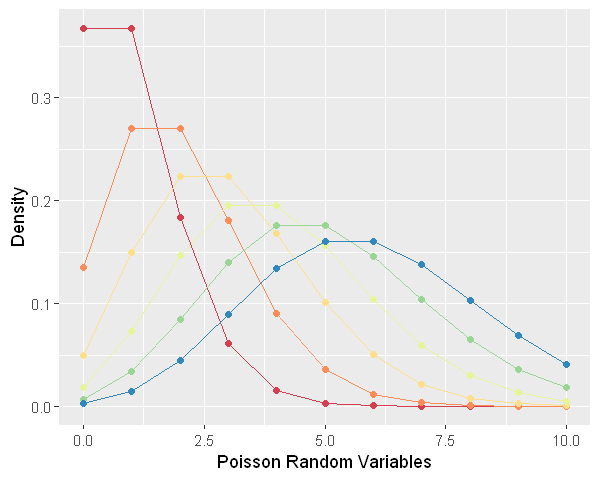

In [23]:
options(repr.plot.width=5, repr.plot.height=4)
b <- ggplot(data.frame(x=c(0:10)), aes(x))
for(l in 1:6){
    b <- b + stat_function(geom="point", n=11, fun=dpois, args=l, color = colors[l]) + 
    stat_function(geom="line", n=11, fun=dpois, args=l, color = colors[l]) +
    xlab("Poisson Random Variables") + ylab("Density")
}
print(b)

### 1. Poisson as an approximation for a Binomial for big $n$ and small $p$

**Theorem 4.2.1:**

Suppose $X$ is a binomial random variable, where

$$P(X=k)=p_{X}(k)=\left(\begin{array}{c} n \\ k \end{array}\right) p^{k}(1-p)^{n-k}, \quad k=0,1, \ldots, n$$

If $n \rightarrow \infty$ and $p \rightarrow 0$ in such a way that $\lambda=np$ remains constant, then

$$\lim _{n \rightarrow \infty \atop p=0} P(X=k)=\lim _{n \rightarrow \infty \atop p=0}\left(\begin{array}{l}
n \\
k
\end{array}\right) p^{k}(1-p)^{n-k}=\frac{e^{-n p}(n p)^{k}}{k !}$$

In [99]:
k= 0:10
df1 <- data.frame(k = k,binomial =dbinom(k, size=5, prob=1/5), poisson = dpois(k, 1))
df2 <- data.frame(k = k,binomial =dbinom(k, size=100, prob=1/100), poisson = dpois(k, 1))

dfl1 <- gather(df1,"Distribution", "value", -k)
dfl2 <- gather(df2,"Distribution", "value", -k)

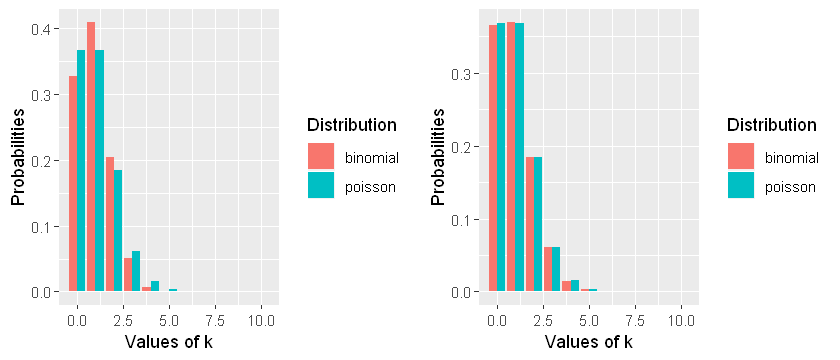

In [100]:
n5 <- ggplot(dfl1, aes(x = k, y = value, fill=Distribution)) +
geom_col(position = "dodge") + xlab("Values of k") + ylab("Probabilities")

n100 <- ggplot(dfl2, aes(x = k, y = value, fill=Distribution)) +
geom_col(position = "dodge") + xlab("Values of k") + ylab("Probabilities")

options(repr.plot.width=7, repr.plot.height=3)
grid.arrange(n5, n100, ncol=2)

### 2. Waiting Time and the exponential distribution

The relevant question is to find out how long we have to wait for the next event to happen:

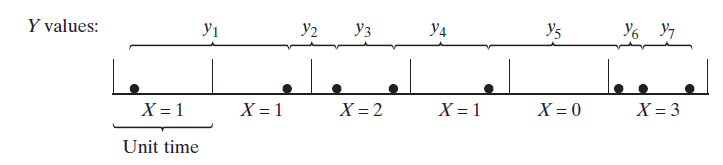

**Theorem 4.2.3:**
Suppose a series of events satisfying the Poisson model are occurring at the rate of $\lambda$ per unit time. Let the random variable $Y$ denote the interval between consecutive events. Then $Y$ has the exponential distribution

$$f_{Y}(y)=\lambda e^{-\lambda y}, \quad y>0$$

As mentioned before, the exponential distribution predicts the amount of waiting time until the next event. For example the amount of time you need to wait until the bus arrives (arrival time). The exponential distribution takes the parameter $\lambda$ as input. Intuitively, this parameter represents the proportion of times that the event occurs during a unit of time.

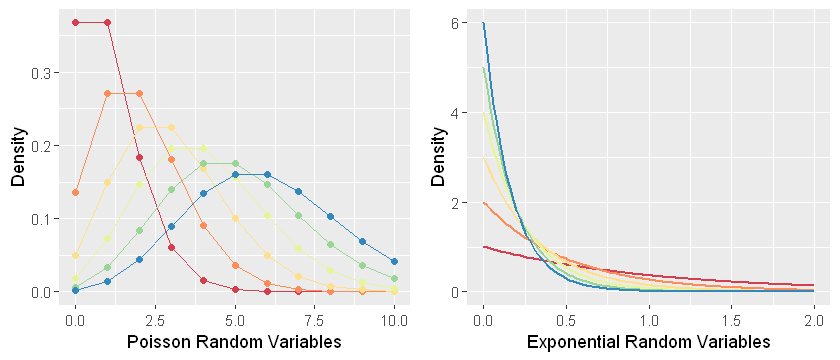

In [31]:
options(repr.plot.width=5, repr.plot.height=4)

e <- ggplot(data.frame(x=c(0:2)), aes(x))
for(l in 1:6){
    e <- e + stat_function(fun = dexp, args=l, color = colors[l], size = 0.7) +
    xlab("Exponential Random Variables") + ylab("Density")
}
options(repr.plot.width=7, repr.plot.height=3)
grid.arrange(b, e, ncol=2)